![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [5]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
buick century luxus (sw),13.0,8,350.0,150.0,4699,14.5,74,usa
honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan
datsun 510 (sw),28.0,4,97.0,92.0,2288,17.0,72,japan
vw rabbit,29.0,4,90.0,70.0,1937,14.2,76,europe


## Feature Selection

- Select 2 columns for the modelling

In [10]:
df_X = df_mpg[['weight', 'displacement']].copy()

## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [14]:
datanorm = scaler.fit_transform(X=df_X)

In [15]:
import pandas as pd

In [18]:
df_norm = pd.DataFrame(datanorm, columns=df_X.columns, index=df_X.index)

In [19]:
df_norm

,weight,displacement
name,,
chevrolet chevelle malibu,0.536150,0.617571
buick skylark 320,0.589736,0.728682
...,...,...
ford ranger,0.286929,0.134367
chevy s-10,0.313864,0.131783


## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=3)

In [24]:
model.fit(df_norm)

KMeans(n_clusters=3)

### Calculate Predictions

In [25]:
model.predict(X=df_norm)

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

### Create a New DataFrame for the Predictions

In [26]:
df_pred = df_X.copy()

In [27]:
df_pred['pred'] = model.predict(X=df_norm)

In [28]:
df_pred

,weight,displacement,pred
name,,,
chevrolet chevelle malibu,3504,307.0,1
buick skylark 320,3693,350.0,1
...,...,...,...
ford ranger,2625,120.0,0
chevy s-10,2720,119.0,0


### Visualize the Model

- You colour the points with the the value of the predictions

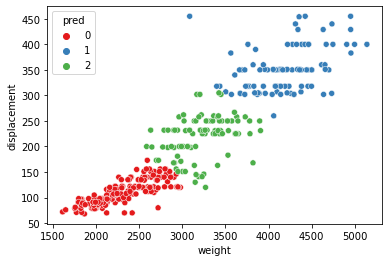

In [30]:
sns.scatterplot(x='weight', y='displacement', hue='pred',
                data=df_pred, palette='Set1');

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
model_agg = AgglomerativeClustering(n_clusters=3)

In [33]:
model_agg.fit(df_norm)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [34]:
model_agg.fit_predict(X=df_norm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2,

#### Create a New DataFrame for the Predictions

In [35]:
df_pred['pred_agg'] = model_agg.fit_predict(X=df_norm)

In [36]:
df_pred

,weight,displacement,pred,pred_agg
name,,,,
chevrolet chevelle malibu,3504,307.0,1,1
buick skylark 320,3693,350.0,1,1
...,...,...,...,...
ford ranger,2625,120.0,0,0
chevy s-10,2720,119.0,0,0


#### Visualize the Model

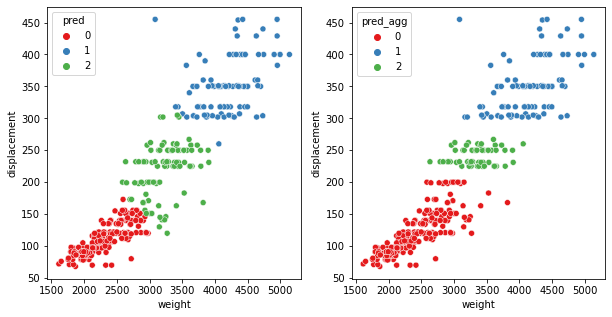

In [40]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='weight', y='displacement', hue='pred',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='weight', y='displacement', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

### Other Model 2

#### Fit the Model

- To cluster 3 groups

In [41]:
from sklearn.cluster import SpectralClustering

In [42]:
model_spt = SpectralClustering(n_clusters=3)

In [43]:
model_spt.fit(df_norm)

SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [44]:
model_spt.fit_predict(X=df_norm)

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2,

#### Create a New DataFrame for the Predictions

In [45]:
df_pred['pred_spt'] = model_spt.fit_predict(X=df_norm)

In [46]:
df_pred

,weight,displacement,pred,pred_agg,pred_spt
name,,,,,
chevrolet chevelle malibu,3504,307.0,1,1,2
buick skylark 320,3693,350.0,1,1,2
...,...,...,...,...,...
ford ranger,2625,120.0,0,0,1
chevy s-10,2720,119.0,0,0,2


#### Visualize the Model

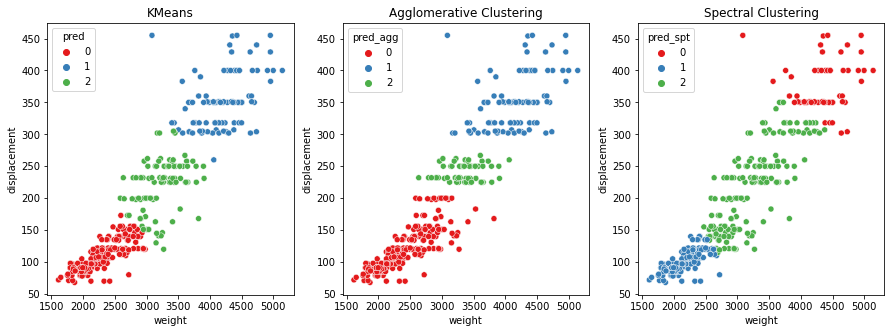

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='weight', y='displacement', hue='pred',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='weight', y='displacement', hue='pred_agg',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='weight', y='displacement', hue='pred_spt',
                data=df_pred, palette='Set1', ax=ax3);

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.